# Library import

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

# Read dataset

In [3]:
df = pd.read_csv('churn_prediction.csv')
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


# Missing value analysis

In [4]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

In [6]:
df.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [7]:
df.dropna(inplace=True,axis=0)

#### Above we can see gender, dependents, occupation, city, customer_nw_category, days_since_last_transaction have missing values 

In [8]:
df.dropna(subset=['gender'],inplace=True,axis=0)

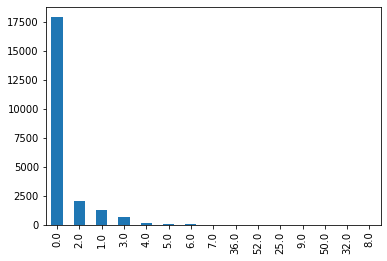

In [9]:
pd.value_counts(df['dependents']).plot(kind='bar')
plt.show()

### From the above bar plot we can see maximum number of values of dependents feature is 0. So we will replace missing value of dependent variable with 0

In [10]:
df['dependents'].fillna(0,inplace=True)

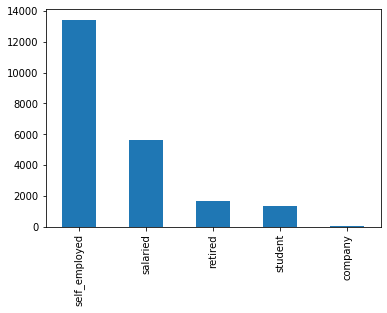

In [11]:
pd.value_counts(df['occupation']).plot(kind='bar')
plt.show()

### From the above bar plot we can see maximum number of values of occupation feature is self_employed. So we will replace missing value of dependent variable with self_employed

In [12]:
df['occupation'].fillna('self_employeed',inplace=True)

### In city feature we will replace missing value with median value

In [13]:
df['city'].fillna(df['city'].median(),inplace=True)

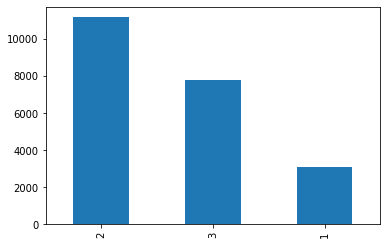

In [14]:
pd.value_counts(df['customer_nw_category']).plot(kind='bar')
plt.show()

### From the above bar plot we can see maximum number of values of customer_nw_category feature is 2. So we will replace missing value of customer_nw_category variable with 2

In [15]:
df['customer_nw_category'].fillna(2,inplace=True)

In [16]:
df['days_since_last_transaction'].head()

0    224.0
4     58.0
5     60.0
6     98.0
7    172.0
Name: days_since_last_transaction, dtype: float64

In [17]:
df['current_month_credit'].head()

0    0.20
4    0.33
5    0.36
6    0.64
7    0.27
Name: current_month_credit, dtype: float64

In [18]:
df['current_month_debit'].head()

0       0.20
4     588.62
5     857.50
6    1299.64
7     443.13
Name: current_month_debit, dtype: float64

In [19]:
df[df['days_since_last_transaction']==np.nan]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn


In [20]:
df['days_since_last_transaction']

0        224.0
4         58.0
5         60.0
6         98.0
7        172.0
         ...  
28375     57.0
28377     70.0
28378     14.0
28379      0.0
28381     59.0
Name: days_since_last_transaction, Length: 22067, dtype: float64

In [21]:
df[df['days_since_last_transaction'].isnull()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn


In [22]:
pd.value_counts(df['days_since_last_transaction'])

0.0      1541
3.0       777
14.0      595
4.0       577
6.0       528
         ... 
309.0       1
92.0        1
170.0       1
288.0       1
134.0       1
Name: days_since_last_transaction, Length: 357, dtype: int64

### From the above data we can see maximum number of values of days_since_last_transaction feature is 0. So we will replace missing value of days_since_last_transaction variable with 0

In [23]:
df['days_since_last_transaction'].fillna(0,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22067 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  object 
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  object 
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [25]:
df.reset_index(inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           22067 non-null  int64  
 1   customer_id                     22067 non-null  int64  
 2   vintage                         22067 non-null  int64  
 3   age                             22067 non-null  int64  
 4   gender                          22067 non-null  object 
 5   dependents                      22067 non-null  float64
 6   occupation                      22067 non-null  object 
 7   city                            22067 non-null  float64
 8   customer_nw_category            22067 non-null  int64  
 9   branch_code                     22067 non-null  int64  
 10  days_since_last_transaction     22067 non-null  float64
 11  current_balance                 22067 non-null  float64
 12  previous_month_end_balance      

In [27]:
df.describe()

,index,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,2.206700e+04,2.206700e+04,2.206700e+04,22067.000000,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,22067.000000
mean,14163.981783,15115.161372,2547.069334,47.931345,0.377487,800.318575,2.211991,874.440975,66.934790,7.132589e+03,7.222013e+03,7.181977e+03,6694.966494,3.943065e+03,3.781366e+03,4.070565e+03,3.720333e+03,7.165418e+03,7.182148e+03,0.193683
std,8184.834214,8737.384035,1598.675520,16.393352,1.044629,431.454448,0.669556,904.244526,84.133427,2.026846e+04,2.105071e+04,1.927121e+04,17101.802052,8.661750e+04,3.254151e+04,5.726446e+04,2.517514e+04,1.959007e+04,2.097682e+04,0.395192
min,0.000000,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.145380e+03,1.428690e+03,-16506.100000,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7060.500000,7522.500000,1321.000000,36.000000,0.000000,409.000000,2.000000,159.000000,11.000000,1.784445e+03,1.906485e+03,2.209835e+03,1817.980000,3.600000e-01,3.700000e-01,4.700000e-01,4.900000e-01,2.029970e+03,2.090665e+03,0.000000
50%,14163.000000,15120.000000,2202.000000,46.000000,0.000000,848.000000,2.000000,531.000000,28.000000,3.335440e+03,3.426740e+03,3.592880e+03,3380.690000,1.130000e+00,6.440000e+00,2.147300e+02,2.285000e+02,3.501740e+03,3.508160e+03,0.000000
75%,21265.500000,22685.500000,3370.000000,60.000000,0.000000,1096.000000,3.000000,1374.000000,90.000000,6.801310e+03,6.826095e+03,6.819235e+03,6628.750000,9.937800e+02,1.129115e+03,1.579220e+03,1.643175e+03,6.858385e+03,6.779355e+03,0.000000
max,28381.000000,30301.000000,11353.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,1.076091e+06,1.001124e+06,1.192704e+06,856596.510000,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,1.074625e+06,1.326487e+06,1.000000


## One hot encoding

In [71]:
pd.get_dummies(df[['gender','occupation']])

,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,0,1,0,0,0,1,0
1,0,1,0,0,0,1,0
2,1,0,0,0,0,1,0
3,0,1,0,1,0,0,0
4,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...
22062,0,1,0,0,0,1,0
22063,1,0,0,0,0,0,1
22064,1,0,0,0,0,1,0
22065,0,1,0,0,1,0,0


In [78]:
enc = OneHotEncoder(handle_unknown='error',sparse=False,drop='first')
new_features = pd.DataFrame(enc.fit_transform(df[['gender','occupation']]),columns=enc.get_feature_names())


In [83]:
new_df=df.join(new_features)

In [89]:
new_df.drop(['index','customer_id','gender','occupation'],axis=1,inplace=True)

In [103]:
categorical_feature = [col for col in df.columns if len(df[col].unique())<25]
continuous_features = [col for col in df.columns if col not in categorical_feature]

In [104]:
categorical_feature

['gender', 'dependents', 'occupation', 'customer_nw_category', 'churn']

In [113]:
continuous_features=continuous_features[2:]
print("Continuous features are: ",continuous_features)
print("length of continuous features are: ",len(continuous_features))

Continuous features are:  ['days_since_last_transaction', 'current_balance', 'previous_month_end_balance', 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2', 'current_month_credit', 'previous_month_credit', 'current_month_debit', 'previous_month_debit', 'current_month_balance', 'previous_month_balance']
length of continuous features are:  11


## Outlier detection for continuous features

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

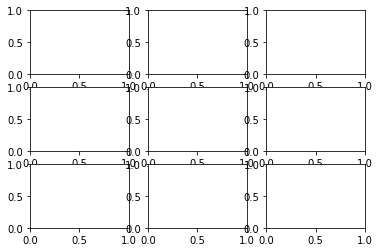

In [120]:
rows,cols = 3,3
fig, ax = plt.subplots(rows, cols)
for row in range(rows):
    for col in range(cols):
        ax.plot(row,col)

In [119]:
print(ax)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bbeb50c10>
